In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


# Code Snippet

In [2]:
input_file = "..\CRAG\CRAG_with_code_snippet.csv"
output_file = "..\CRAG\CRAG_with_code_snippet_new.csv"

processed_rows = []

# Open the CSV and read line by line
with open(input_file, "r", encoding="utf-8") as file:
    reader = csv.reader(file)  # Automatically handles commas
    for row in reader:
        # Ensure row has at least 4 columns
        if len(row) >= 4:
            package_name = row[0]
            label = row[1]
            llm_prediction = row[2]
            explanation = ",".join(row[3:])  # Merge everything from 4th column onward
            processed_rows.append([package_name, label, llm_prediction, explanation])

# Convert processed data to a DataFrame
df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# Save to CSV with quoted 4th column
df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

print(f"Processed file saved to: {output_file}")


Processed file saved to: ..\CRAG\CRAG_with_code_snippet_new.csv


In [6]:
code_snippet_results = pd.read_csv('..\CRAG\CRAG_with_code_snippet_new.csv')

In [7]:
code_snippet_results.head()

,package_name,label,llm_prediction,explanation
0,selfpostponghydra-v8.31,1,1,The code snippet contains suspicious functiona...
1,types-docutils-0.19.0,0,1,"The code snippet is from the setup.py file, an..."
2,py27hash-1.1.0,0,1,malicious
3,mianprojlol,1,1,Based on the provided YARA rules context and G...
4,pipdeptree-2.2.1,0,1,The provided YARA rule context reveals specifi...


# AST RUles

In [4]:
input_file = "..\CRAG\CRAG_with_ast_no_snippet.csv"
output_file = "..\CRAG\CRAG_with_ast_no_snippet_new.csv"

processed_rows = []

# Open the CSV and read line by line
with open(input_file, "r", encoding="utf-8") as file:
    reader = csv.reader(file)  # Automatically handles commas
    for row in reader:
        # Ensure row has at least 4 columns
        if len(row) >= 4:
            package_name = row[0]
            label = row[1]
            llm_prediction = row[2]
            explanation = ",".join(row[3:])  # Merge everything from 4th column onward
            processed_rows.append([package_name, label, llm_prediction, explanation])

# Convert processed data to a DataFrame
df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# Save to CSV with quoted 4th column
df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

print(f"Processed file saved to: {output_file}")


Processed file saved to: ..\CRAG\CRAG_with_ast_no_snippet_new.csv


In [8]:
ast_results = pd.read_csv("..\CRAG\CRAG_with_ast_no_snippet_new.csv")

In [9]:
ast_results.head()

,package_name,label,llm_prediction,explanation
0,python-benedict-0.25.2,0,0,The provided code flow indicates that the pack...
1,requests-oauth-0.4.1,0,1,Based on the provided code flow and the fact ...
2,fastparquet-0.8.1,0,1,The provided code flow is for a setup script o...
3,strsimpy-0.2.1,0,0,"Based on the code flow and context provided, s..."
4,smbprotocol-1.9.0,0,0,smbprotocol setup.py start with importing os m...


#Analysis

In [ ]:
# Ensure labels and predictions are properly formatted as integers
code_snippet_results = code_snippet_results[code_snippet_results['label'].isin([0, 1])].copy()
ast_results = ast_results[ast_results['label'].isin([0, 1, -1])].copy()

# Convert label and prediction columns to integers
code_snippet_results['label'] = code_snippet_results['label'].astype(int)
code_snippet_results['llm_prediction'] = code_snippet_results['llm_prediction'].astype(int)

ast_results['label'] = ast_results['label'].astype(int)
ast_results['llm_prediction'] = ast_results['llm_prediction'].astype(int)

In [11]:
# Compute evaluation metrics for code_snippet
code_snippet_accuracy = accuracy_score(code_snippet_results['label'], code_snippet_results['llm_prediction'])
code_snippet_precision = precision_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')
code_snippet_recall = recall_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')
code_snippet_f1 = f1_score(code_snippet_results['label'], code_snippet_results['llm_prediction'], average='binary')

# Compute evaluation metrics for ast including -1 category
ast_accuracy = accuracy_score(ast_results['label'], ast_results['llm_prediction'])
ast_precision = precision_score(ast_results['label'], ast_results['llm_prediction'], average='macro')
ast_recall = recall_score(ast_results['label'], ast_results['llm_prediction'], average='macro')
ast_f1 = f1_score(ast_results['label'], ast_results['llm_prediction'], average='macro')


code_snippet Metrics:
Accuracy: 0.6187
Precision: 0.3324
Recall: 0.4621
F1 Score: 0.3867

ast Metrics:
Accuracy: 0.5759
Precision: 0.5082
Recall: 0.5095
F1 Score: 0.5049


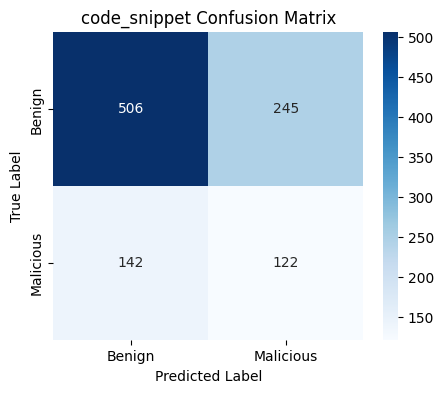

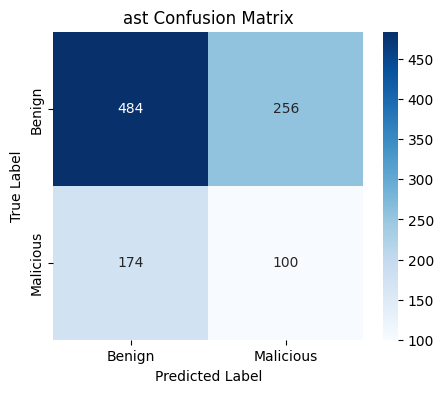

In [12]:

# Print results
print("code_snippet Metrics:")
print(f"Accuracy: {code_snippet_accuracy:.4f}")
print(f"Precision: {code_snippet_precision:.4f}")
print(f"Recall: {code_snippet_recall:.4f}")
print(f"F1 Score: {code_snippet_f1:.4f}\n")

print("ast Metrics:")
print(f"Accuracy: {ast_accuracy:.4f}")
print(f"Precision: {ast_precision:.4f}")
print(f"Recall: {ast_recall:.4f}")
print(f"F1 Score: {ast_f1:.4f}")

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(code_snippet_results['label'], code_snippet_results['llm_prediction'], "code_snippet Confusion Matrix")
plot_confusion_matrix(ast_results['label'], ast_results['llm_prediction'], "ast Confusion Matrix")


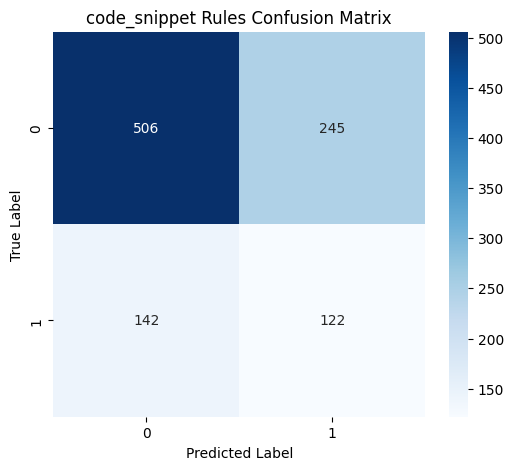

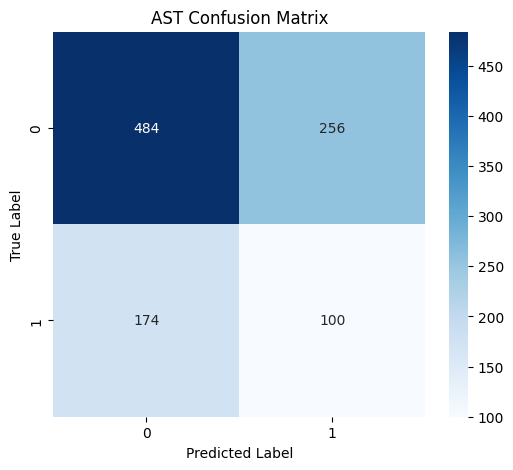

In [16]:
# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(code_snippet_results['label'], code_snippet_results['llm_prediction'], "code_snippet Rules Confusion Matrix", labels=[0, 1])
plot_confusion_matrix(ast_results['label'], ast_results['llm_prediction'], "AST Confusion Matrix", labels=[ 0, 1])


In [15]:
# Compute evaluation metrics for code_snippet
code_snippet_report = classification_report(code_snippet_results['label'], code_snippet_results['llm_prediction'], output_dict=True)

# Compute evaluation metrics for ast including -1 category
ast_report = classification_report(ast_results['label'], ast_results['llm_prediction'], output_dict=True)

# Generate LaTeX table
# Generate LaTeX table
evaluation_metrics_df = pd.DataFrame({
    "Class": ["0 (Benign)", "1 (Malicious)", "Accuracy", "Balanced Accuracy"],
    "code_snippet Precision": [f"{code_snippet_report['0']['precision']:.2f}", f"{code_snippet_report['1']['precision']:.2f}", f"{code_snippet_report['accuracy']:.2f}", f"{code_snippet_report['macro avg']['precision']:.2f}"],
    "code_snippet Recall": [f"{code_snippet_report['0']['recall']:.2f}", f"{code_snippet_report['1']['recall']:.2f}", "", ""],
    "code_snippet F1-Score": [f"{code_snippet_report['0']['f1-score']:.2f}", f"{code_snippet_report['1']['f1-score']:.2f}", "", ""],
    "code_snippet Support": [f"{code_snippet_report['0']['support']}", f"{code_snippet_report['1']['support']}", "", ""],
    "ast Precision": [f"{ast_report['0']['precision']:.2f}", f"{ast_report['1']['precision']:.2f}", f"{ast_report['accuracy']:.2f}", f"{ast_report['macro avg']['precision']:.2f}"],
    "ast Recall": [f"{ast_report['0']['recall']:.2f}", f"{ast_report['1']['recall']:.2f}", "", ""],
    "ast F1-Score": [f"{ast_report['0']['f1-score']:.2f}", f"{ast_report['1']['f1-score']:.2f}", "", ""],
    "ast Support": [f"{ast_report['0']['support']}", f"{ast_report['1']['support']}", "", ""]
})

latex_table = evaluation_metrics_df.to_latex(index=False)
print(latex_table)


\begin{tabular}{lllllllll}
\toprule
Class & code_snippet Precision & code_snippet Recall & code_snippet F1-Score & code_snippet Support & ast Precision & ast Recall & ast F1-Score & ast Support \\
\midrule
0 (Benign) & 0.78 & 0.67 & 0.72 & 751.0 & 0.74 & 0.65 & 0.69 & 740.0 \\
1 (Malicious) & 0.33 & 0.46 & 0.39 & 264.0 & 0.28 & 0.36 & 0.32 & 274.0 \\
Accuracy & 0.62 &  &  &  & 0.58 &  &  &  \\
Balanced Accuracy & 0.56 &  &  &  & 0.51 &  &  &  \\
\bottomrule
\end{tabular}



In [12]:
yara_results.shape

(1026, 4)

In [13]:
gitad_results.shape

(1017, 4)